# Preparação do ambiente

In [2]:
#Preparando o ambiente 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px




df = pd.read_csv('data/listings.csv')

# Checando Shape e tipos das colunas

In [3]:


df.shape
df.info()
df.describe(include='all')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43068 entries, 0 to 43067
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            43068 non-null  int64  
 1   listing_url                                   43068 non-null  object 
 2   scrape_id                                     43068 non-null  int64  
 3   last_scraped                                  43068 non-null  object 
 4   source                                        43068 non-null  object 
 5   name                                          43068 non-null  object 
 6   description                                   42017 non-null  object 
 7   neighborhood_overview                         16330 non-null  object 
 8   picture_url                                   43068 non-null  object 
 9   host_id                                       43068 non-null 

id                                      listing_url  \
0  821198084644106078  https://www.airbnb.com/rooms/821198084644106078   
1  821198370698658112  https://www.airbnb.com/rooms/821198370698658112   
2  821200521820144734  https://www.airbnb.com/rooms/821200521820144734   
3  821213014263313420  https://www.airbnb.com/rooms/821213014263313420   
4  821223043903573522  https://www.airbnb.com/rooms/821223043903573522   

        scrape_id last_scraped           source  \
0  20250926170004   2025-09-27      city scrape   
1  20250926170004   2025-09-27      city scrape   
2  20250926170004   2025-09-26      city scrape   
3  20250926170004   2025-09-27  previous scrape   
4  20250926170004   2025-09-27      city scrape   

                              name  \
0  Bright and Peaceful Leblon Loft   
1       Copacabana 100% reformado.   
2                hambiente familia   
3  Amazing en suite bedroom Leblon   
4  Incrível apartamento frente mar   

                                         description  \
0  Welcome! Come relax in our bright and stylish ...   
1  Guarantee of a safe and quality stay!  <br /><...   
2  Relax with the whole family in this quiet acco...   
3  Kick back and relax in this calm, stylish spac...   
4  Amazing 1-bedroom apartment facing the sea. Co...   

                               neighborhood_overview  \
0  Beautiful tree lined street just 3 blocks from...   
1  Copacabana, in the part near the neighborhood ...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url    host_id  ...  \
0  https://a0.muscache.com/pictures/hosting/Hosti...   84350716  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...    4347269  ...   
2  https://a0.muscache.com/pictures/7485ea61-a28a...  499903412  ...   
3  https://a0.muscache.com/pictures/miso/Hosting-...  449763717  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...   25961210  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.94                   4.99                4.85   
1                         NaN                    NaN                 NaN   
2                         NaN                    NaN                 NaN   
3                        5.00                   5.00                4.67   
4                        5.00                   5.00                5.00   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              1   
1     NaN                f                              2   
2     NaN                t                              2   
3     NaN                f                              2   
4     NaN                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           2   
2                                           1   
3                                           1   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            1   
3                                            1   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              2.72  
1                                           0               NaN  
2                                           0               NaN  
3                                           0              0.10  
4                                           0              0.60  

[5 rows x 79 columns]

# Tratamento dos dados

In [4]:


#transformando tudo em snake_case
df.columns = (df.columns.str.lower().str.replace(' ','_').str.replace('-','_'))

In [5]:
#removendo duplicatas
df = df.drop_duplicates(subset='id')

In [6]:
#analisando os valores nulos
df.isna().sum().sort_values(ascending=False)

calendar_updated                43068
license                         43068
neighbourhood_group_cleansed    43068
neighbourhood                   26738
neighborhood_overview           26738
                                ...  
minimum_nights_avg_ntm              0
maximum_nights_avg_ntm              0
availability_30                     0
availability_60                     0
amenities                           0
Length: 79, dtype: int64

In [7]:
(df.isna().mean() * 100).sort_values(ascending=False)


calendar_updated                100.000000
license                         100.000000
neighbourhood_group_cleansed    100.000000
neighbourhood                    62.083217
neighborhood_overview            62.083217
                                   ...    
minimum_nights_avg_ntm            0.000000
maximum_nights_avg_ntm            0.000000
availability_30                   0.000000
availability_60                   0.000000
amenities                         0.000000
Length: 79, dtype: float64

In [8]:
#removendo colunas com 80% de nulos ou mais
cols_drop = ["neighbourhood_group_cleansed", "license", "host_about"]
df = df.drop(columns=cols_drop)


In [9]:
#alguns nulos atrapalham a analise, irei remover linhas nulas no preço, latitude, lontitude e tipo de quarto
df = df.dropna(subset=["price", "latitude", "longitude", "room_type"])


In [10]:
#nas colunas de review nulo significa que não houve avaliação. trocarei null por 0
review_cols = [
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value"
]

df[review_cols] = df[review_cols].fillna(0)


In [11]:
#em colunas categoricas trocarei null por Não informado
cat_cols= ["host_response_time",
           'host_response_rate',
           'bathrooms_text',
           'neighbourhood',
           'host_verifications']

df[cat_cols] = df[cat_cols].fillna("Não informado")


In [12]:
#reviews_per_month nulo = sem avaliação
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)


In [13]:
#em bedrooms, beds e bathrooms usarei a mediana como substituição ao null
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].median())
df["beds"] = df["beds"].fillna(df["beds"].median())
df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms"].median())


In [14]:
#avaliando a existencia de nulos
df.isna().sum()


id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 76, dtype: int64

In [15]:
#conversão de tipos
df["price"] = (
    df["price"]
    .str.replace("$", "")
    .str.replace(",", "")
    .astype(float)
)



In [16]:
#datas 
df["last_review"] = pd.to_datetime(df["last_review"])


In [17]:
#numeros
df["availability_365"] = df["availability_365"].astype(int)


In [18]:
#algumas colunas vem com descrição onde queremos apenas valores, criar extrações 
df["bathrooms"] = (
    df["bathrooms_text"]
    .str.extract(r"(\d*\.?\d+)")
    .astype(float)
)


In [19]:
#criando uma coluna chamada preço por pessoa
df["price_per_person"] = df["price"] / df["accommodates"]


In [20]:
#consistencia geografica
df = df[
    (df["latitude"].between(-90, 90)) &
    (df["longitude"].between(-180, 180))
]


In [21]:
#remover outliers
df = df[df["price"] < df["price"].quantile(0.99)]


In [22]:
#dataset limpo final 
df_clean = df.copy()
df_clean.to_csv("listings_clean.csv", index=False)



# Distribuição dos preços


<Axes: xlabel='price', ylabel='Count'>

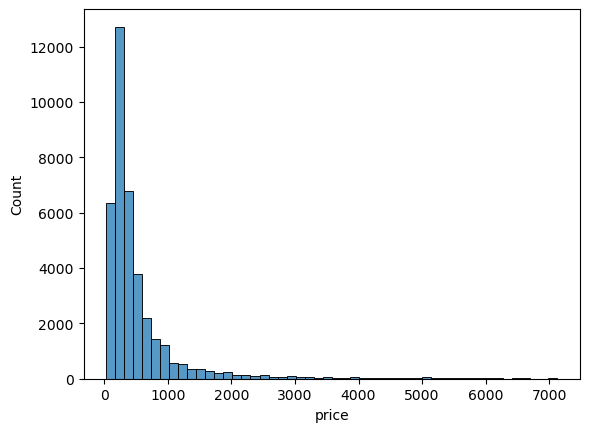

In [23]:

sns.histplot(df_clean["price"], bins=50)

# Preço por tipo de quarto

<Axes: xlabel='room_type', ylabel='price'>

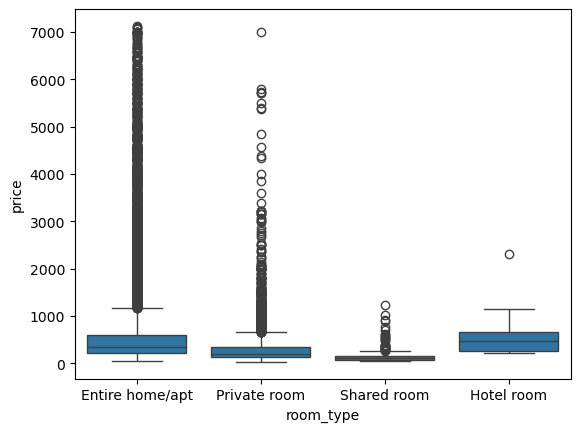

In [25]:

sns.boxplot(data=df_clean, x="room_type", y="price")


# Mapa interativo

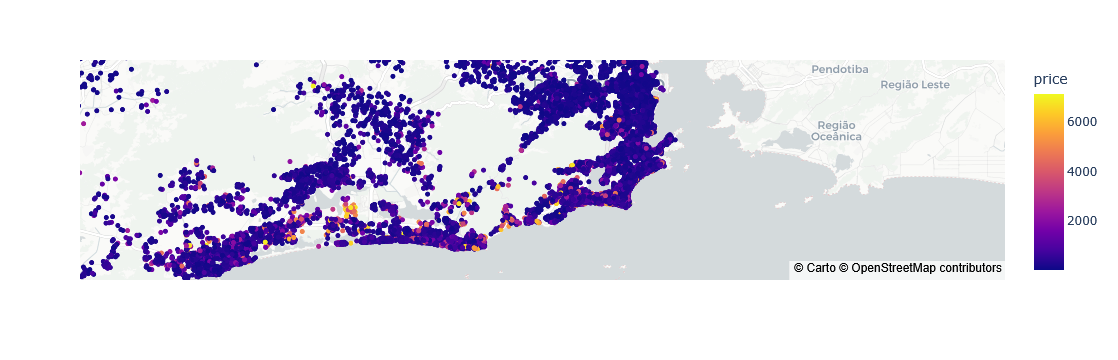

In [26]:

px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    color="price",
    zoom=10,
    mapbox_style="carto-positron"
)


# Avaliações

<Axes: xlabel='review_scores_rating', ylabel='Count'>

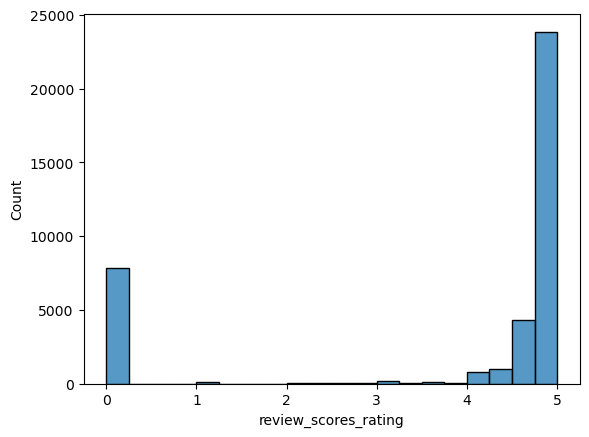

In [27]:

sns.histplot(df["review_scores_rating"], bins=20)


# SUPERHOST x HOST

<Axes: xlabel='host_is_superhost', ylabel='price'>

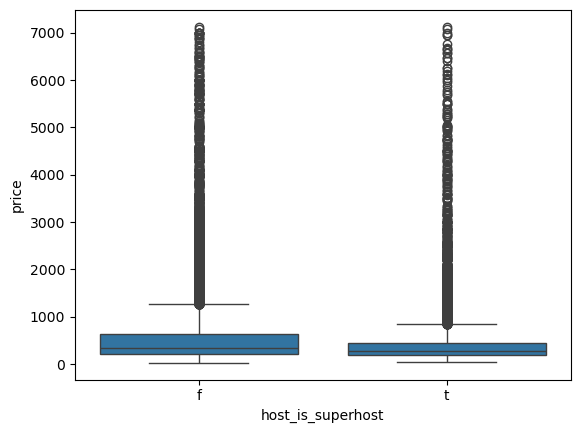

In [28]:

sns.boxplot(x="host_is_superhost", y="price", data=df)


# COMPARAÇÃO DE PREÇO ENTRE APARTAMENTO INTEIRO E QUARTO PRIVADO

In [38]:

media_apt = df_clean[df_clean["room_type"] == "Entire home/apt"]["price"].mean()
media_quarto = df_clean[df_clean["room_type"] == "Private room"]["price"].mean()
perc = ((media_apt - media_quarto) / media_quarto) * 100
print(f"Apartamentos inteiros são {perc:.1f}% mais caros que quartos privados.")




Apartamentos inteiros são 86.7% mais caros que quartos privados.


# A VIZINHANÇA IMPACTA O PREÇO?

In [30]:

df_clean.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).head(10)


neighbourhood
Maricá, Rio de Janeiro, Brazil                         2500.000000
Copacaban, Rio de Janeiro, Brazil                      2235.000000
Joá, Rio de Janeiro, Brazil                            2176.705882
Recreio dos Bandeir, Rio de Janeiro, Brazil            1935.000000
Teresopolis, Rio de Janeiro, Brazil                    1833.000000
Río de Janeiro, Rio de Janeiro, Brazil                 1425.000000
Copacabana - Rio de Janeiro, Rio de Janeiro, Brazil    1393.666667
Barra da Tijuca , Rj, Rio de Janeiro, Brazil           1260.000000
Alto da Boa Vista, Rio de Janeiro, Brazil              1209.000000
Gávea, Rio de Janeiro, Brazil                          1188.607143
Name: price, dtype: float64

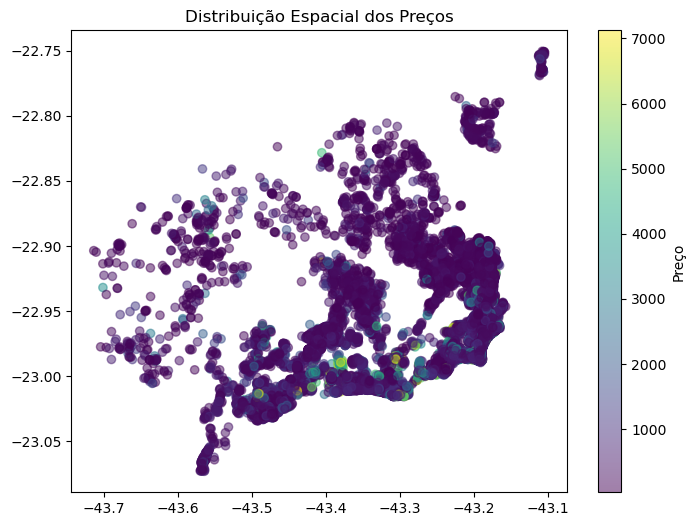

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean["longitude"], df_clean["latitude"], c=df_clean["price"], alpha=0.5)
plt.colorbar(label="Preço")
plt.title("Distribuição Espacial dos Preços")
plt.show()

In [32]:
df_clean[["price", "latitude", "longitude"]].corr()


price  latitude  longitude
price      1.000000 -0.181530  -0.058817
latitude  -0.181530  1.000000   0.374394
longitude -0.058817  0.374394   1.000000

In [33]:
df_clean.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).head(10)


neighbourhood
Maricá, Rio de Janeiro, Brazil                         2500.000000
Copacaban, Rio de Janeiro, Brazil                      2235.000000
Joá, Rio de Janeiro, Brazil                            2176.705882
Recreio dos Bandeir, Rio de Janeiro, Brazil            1935.000000
Teresopolis, Rio de Janeiro, Brazil                    1833.000000
Río de Janeiro, Rio de Janeiro, Brazil                 1425.000000
Copacabana - Rio de Janeiro, Rio de Janeiro, Brazil    1393.666667
Barra da Tijuca , Rj, Rio de Janeiro, Brazil           1260.000000
Alto da Boa Vista, Rio de Janeiro, Brazil              1209.000000
Gávea, Rio de Janeiro, Brazil                          1188.607143
Name: price, dtype: float64

In [34]:
df_clean[["price", "latitude", "longitude"]].corr()


price  latitude  longitude
price      1.000000 -0.181530  -0.058817
latitude  -0.181530  1.000000   0.374394
longitude -0.058817  0.374394   1.000000

In [35]:
df_clean.groupby("neighbourhood")["price"].mean().sort_values().head(10)


neighbourhood
Maria da Graça, Rio de Janeiro, Brazil                        59.000000
Ricardo de Albuquerque, Rio de Janeiro, Brazil                62.000000
Vicente de Carvalh, Rio de Janeiro, Brazil                    74.000000
Rio de Janeiro, Rio de janeiro, Brazil                        75.000000
Ramos, Rio de Janeiro, Brazil                                 79.000000
Moneró, Rio de Janeiro, Brazil                                80.000000
Senador Vasconcelos, Rio de Janeiro, Brazil                   81.333333
Benfica, Rio de Janeiro, Brazil                               84.000000
Engenho de Dentro - Rio de Janeiro, Rio de Janeiro, Brazil    84.000000
Brás de Pina, Rio de Janeiro, Brazil                          85.000000
Name: price, dtype: float64

# REVIEWS IMPACTAM NO PREÇO?

In [36]:

df_clean[["price", "review_scores_rating"]].corr()


price  review_scores_rating
price                 1.000000             -0.226704
review_scores_rating -0.226704              1.000000

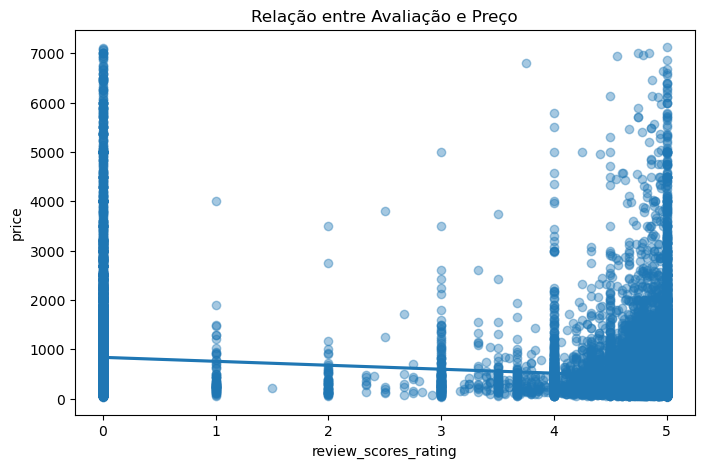

In [37]:
plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x="review_scores_rating",
    y="price",
    scatter_kws={"alpha": 0.4}
)
plt.title("Relação entre Avaliação e Preço")
plt.show()


# Conclusão 